In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

##Multi-class classification on Fashion data from tensorflow

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

###Data is already divided into train and test data. 60000 images are present in training data. 10000 images are present in testing data

In [ ]:
(train_data , train_label) , (test_data , test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Text(0.5, 1.0, '9')

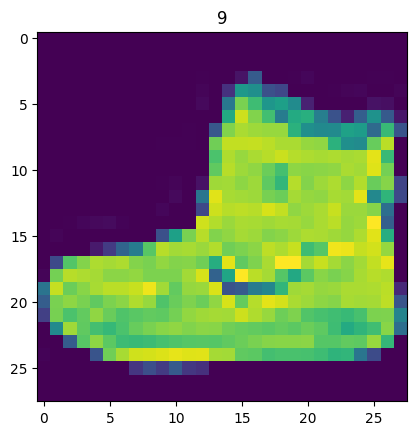

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
plt.title(train_label[0])

In [ ]:
class_names=["T-shirt/top",	"Trouser",	"Pullover",	"Dress",	"Coat",	"Sandal","Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

###Visializing random data with class labels

Text(0.5, 1.0, 'Bag')

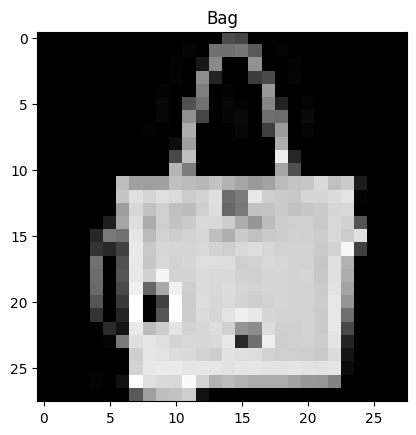

In [ ]:
import random
random_index=random.randint(0,len(train_data))
plt.imshow(train_data[random_index],cmap=plt.cm.gray)
plt.title(class_names[train_label[random_index]])

In [ ]:
train_data[0].shape,train_label[0].shape

((28, 28), ())

In [ ]:
#set random seed
tf.random.set_seed(42)

#create the model
fashion_model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),       #converting multiple dimension into single dimension
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")      #for multi-class classification, softmax is used and for binary classification, sigmoid is used
])

#compile the model
fashion_model_1.compile(
    #loss=tf.keras.losses.CategoricalCrossentropy(),    #when CategoricalCrossentropy is used, data must be in encoded form
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#fit the model
fashion_model_1_history = fashion_model_1.fit(train_data,train_label,epochs=10,validation_data=(test_data,test_label))

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 2.3344 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accurac

###Model accuracy is 35%. So we will improve accuracy by:


*   Normalizing Data
*   Adding ideal Learning rate



In [ ]:
train_data[0].min() , train_data[0].max()

(0, 255)

To normalize data. Data should be divided by max

In [ ]:
train_data_norm = train_data / 255
test_data_norm = test_data / 255

###Create the model with normalize data

In [ ]:
#set random seed
tf.random.set_seed(42)

#create the model
fashion_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile the model
fashion_model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#fit the model
#Since we are using CategoricalCrossentropy, we will pass One-hot encoded data
fashion_model_2.fit(train_data_norm,tf.one_hot(train_label,depth=10),epochs=10,validation_data=(test_data_norm,tf.one_hot(test_label,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2727 - accuracy: 0.5026 - val_loss: 0.9632 - val_accuracy: 0.6711
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8497 - accuracy: 0.7012 - val_loss: 0.8110 - val_accuracy: 0.7007
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7341 - accuracy: 0.7364 - val_loss: 0.7238 - val_accuracy: 0.7450
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6536 - accuracy: 0.7764 - val_loss: 0.6618 - val_accuracy: 0.7801
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6153 - accuracy: 0.7910 - val_loss: 0.6504 - val_accuracy: 0.7830
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5993 - accuracy: 0.7966 - val_loss: 0.6419 - val_accuracy: 0.7863
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5914 - accuracy: 0.7973 - val_loss: 0.6380 - val_accuracy:

By using normalize data, accuracy is shifted to 79%.

In [ ]:
#set random seed
tf.random.set_seed(42)

#create the model
fashion_model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile the model
fashion_model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#create the ideal learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

#fit the model
history_3 = fashion_model_3.fit(train_data_norm,train_label,epochs=20,validation_data=(test_data_norm,test_label),callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2710 - accuracy: 0.5295 - val_loss: 0.8926 - val_accuracy: 0.7213 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7740 - accuracy: 0.7447 - val_loss: 0.7222 - val_accuracy: 0.7593 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6705 - accuracy: 0.7717 - val_loss: 0.6875 - val_accuracy: 0.7621 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6278 - accuracy: 0.7843 - val_loss: 0.6345 - val_accuracy: 0.7832 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6074 - accuracy: 0.7916 - val_loss: 0.6436 - val_accuracy: 0.7794 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5948 - accuracy: 0.7926 - val_loss: 0.6478 - val_accuracy: 0.7737 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

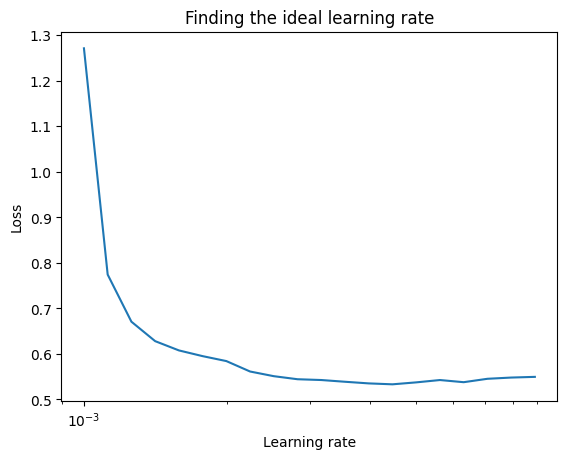

In [ ]:
import matplotlib.pyplot as plt
lr=1e-3*10**(tf.range(20)/20)
plt.semilogx(lr,history_3.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

###let's visualize result using confusion metrics

In [ ]:
from sklearn.metrics import confusion_matrix
predictions=fashion_model_3.predict(test_data_norm)

313/313 [==============================] - 1s 3ms/step


In [ ]:
predictions

array([[4.3545171e-08, 4.6525873e-08, 6.4895325e-09, ..., 1.3934650e-01,
        2.5271196e-03, 6.7083293e-01],
       [3.2449872e-04, 5.3036646e-09, 9.4730383e-01, ..., 0.0000000e+00,
        5.6783691e-05, 0.0000000e+00],
       [6.2370731e-09, 9.9808562e-01, 1.5778646e-04, ..., 1.2958518e-17,
        5.0367843e-09, 1.5293707e-16],
       ...,
       [4.8062842e-02, 2.3616285e-06, 4.3673678e-03, ..., 3.1709233e-09,
        4.6217087e-01, 1.3881039e-09],
       [2.1150713e-06, 9.3035775e-01, 4.3469362e-04, ..., 1.7186200e-09,
        2.9747503e-07, 2.9253620e-09],
       [1.0426808e-05, 5.5110598e-07, 1.5343417e-06, ..., 1.0838093e-02,
        1.0181301e-02, 8.9325717e-05]], dtype=float32)

In [ ]:
confusion_matrix_3 = confusion_matrix(test_label,predictions.argmax(axis=1))
confusion_matrix_3

array([[796,   1,   5,  91,   3,   4,  87,   0,  13,   0],
       [  2, 928,  10,  52,   5,   1,   0,   0,   2,   0],
       [ 24,   0, 654,  27, 153,   0, 133,   0,   9,   0],
       [ 69,  10,  17, 823,  26,   1,  53,   0,   1,   0],
       [  1,   2, 114,  36, 737,   0, 105,   0,   5,   0],
       [  0,   0,   0,   1,   0, 870,   0,  65,  19,  45],
       [207,   0,  93,  72, 111,   0, 489,   0,  28,   0],
       [  0,   0,   0,   0,   0,  29,   0, 915,   0,  56],
       [  7,   0,   3,   5,   1,  16,  28,   3, 935,   2],
       [  0,   0,   0,   1,   0,  16,   0,  40,   6, 937]])

###lets make confusion matrix presentable

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

  #create the confusion matrix
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
  n_classes=cm.shape[0]

  #let pretty it
  fig , ax = plt.subplots(figsize=figsize)
  #create the matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  for i, j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
    plt.text(j ,i ,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size=text_size)

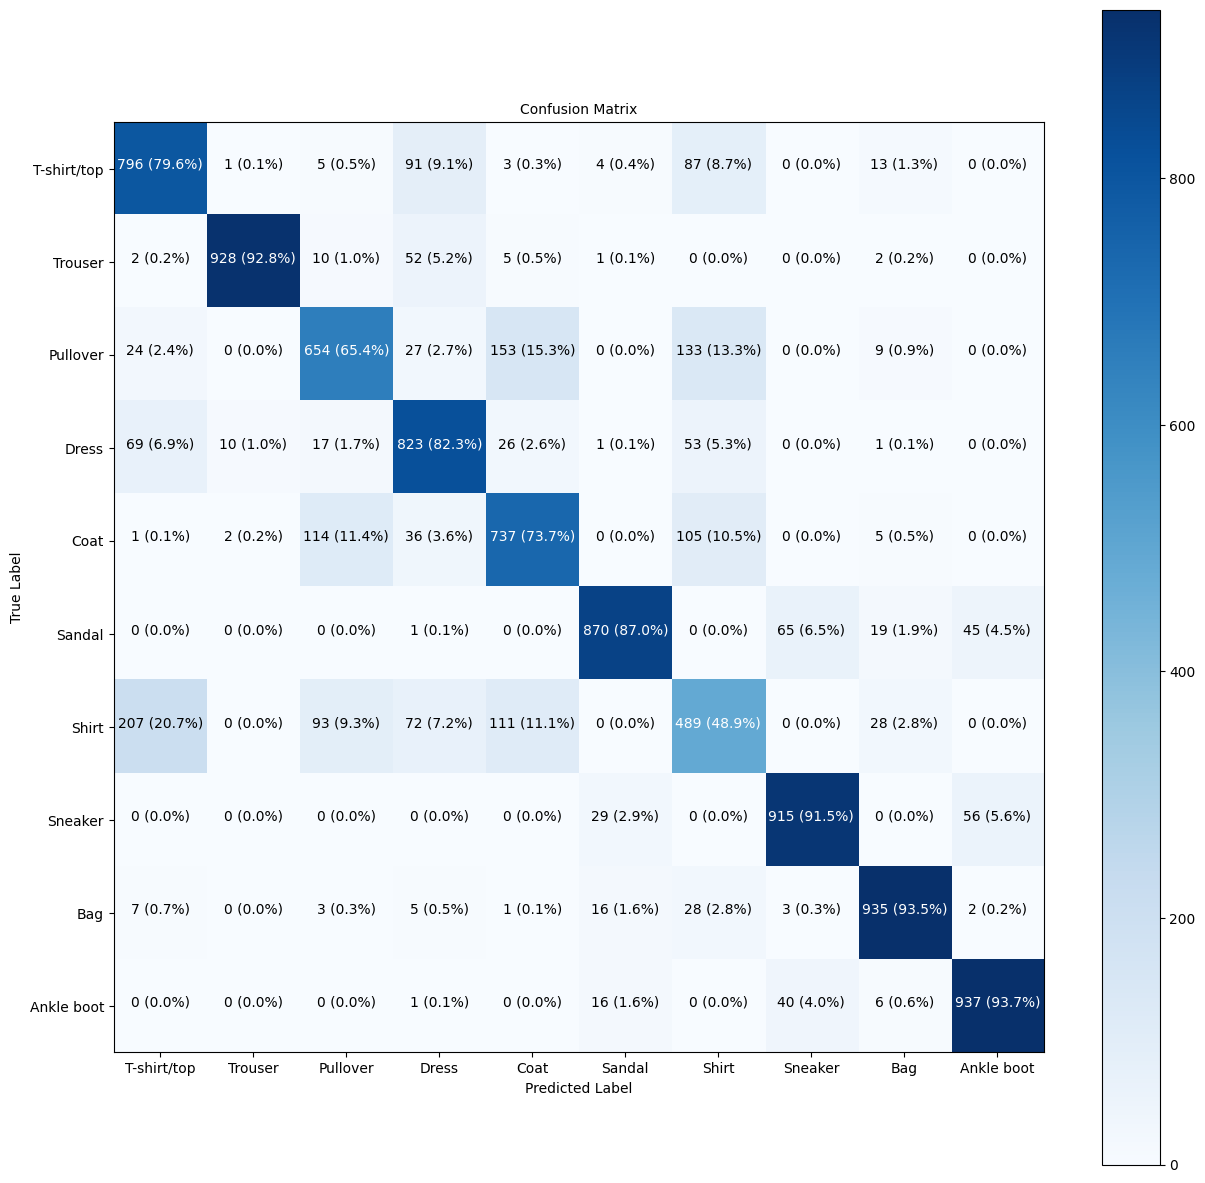

In [ ]:
make_confusion_matrix(y_true=test_label,y_pred=predictions.argmax(axis=1),classes=class_names,figsize=(15,15),text_size=10)

Let's plot some random images


In [ ]:
import random
import tensorflow as tf
def plot_random_image(model, images, true_labels,classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """


  #set up random integer
  index = random.randint(0,len(images))

  #create predictions and target
  target_image = images[index]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[index]]

  #plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  #change the color of titiles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color = color)


1/1 [==============================] - 0s 26ms/step


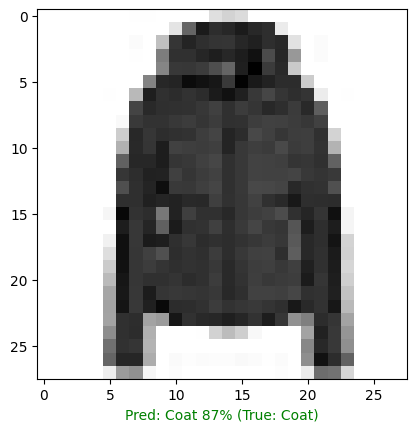

In [ ]:
plot_random_image(fashion_model_3,test_data_norm,test_label,classes=class_names)